#0) 서론

- 사람:
  - 문장 또는 문서의 유사도는 동일한 단어 또는 비슷한 단어가 얼마나 공통적으로 많이 사용되었는지
- 유사도 성능 결정 기준
  - 단어들을 어떤 방법으로 수치화하여 표현했는지
  - 문서 간의 단어들의 차이를 어떤 방법(유클리드 거리, 코사인 유사도 등)으로 계산했는지

# 1) 코사인 유사도(Cosine Similarity)

## 1. 코사인 유사도(Cosine Similarity)

- 정의
  - 두 벡터 간의 코사인 각도를 이용하여 구할 수 있는 두 벡터의 유사도
- 해석
  1. 원전히 동일한 경우: 1
  2. 90도의 각도 시: 0
  3. 반대의 방향을 가지는 경우: -1
  - 1에 가까울 수 록 유사도가 높음
- similarity=cos(Θ)=dot(A,B)/(||A||\*||B||)




In [1]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

doc1 = np.array([0,1,1,1]) #문장을 토큰화 한것
doc2 = np.array([1,0,1,1])
doc3 = np.array([2,0,2,2])

print('문서 1과 문서2의 유사도 :',cos_sim(doc1, doc2))
print('문서 1과 문서3의 유사도 :',cos_sim(doc1, doc3))
print('문서 2와 문서3의 유사도 :',cos_sim(doc2, doc3))

문서 1과 문서2의 유사도 : 0.6666666666666667
문서 1과 문서3의 유사도 : 0.6666666666666667
문서 2와 문서3의 유사도 : 1.0000000000000002


- 모든 단어의 빈도수가 동일하게 증가하는 경우에는 기존의 문서와 코사인 유사도의 값이 1

## 2. 유사도를 이용한 추천 시스템 구현하기

- https://www.kaggle.com/rounakbanik/the-movies-dataset

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

data = pd.read_csv('movies_metadata.csv', low_memory=False)
# 상위 2만개의 샘플을 data에 저장
data = data.head(20000)

# overview 열에 존재하는 모든 결측값을 전부 카운트하여 출력
print('overview 열의 결측값의 수:',data['overview'].isnull().sum())

# 결측값을 빈 값으로 대체
data['overview'] = data['overview'].fillna('')

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['overview'])
print('TF-IDF 행렬의 크기(shape) :',tfidf_matrix.shape)

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print('코사인 유사도 연산 결과 :',cosine_sim.shape)

title_to_index = dict(zip(data['title'], data.index))

# 영화 제목 Father of the Bride Part II의 인덱스를 리턴
idx = title_to_index['Father of the Bride Part II']
print(idx)

def get_recommendations(title, cosine_sim=cosine_sim):
    # 선택한 영화의 타이틀로부터 해당 영화의 인덱스를 받아온다.
    idx = title_to_index[title]

    # 해당 영화와 모든 영화와의 유사도를 가져온다.
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 유사도에 따라 영화들을 정렬한다.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 가장 유사한 10개의 영화를 받아온다.
    sim_scores = sim_scores[1:11]

    # 가장 유사한 10개의 영화의 인덱스를 얻는다.
    movie_indices = [idx[0] for idx in sim_scores]

    # 가장 유사한 10개의 영화의 제목을 리턴한다.
    return data['title'].iloc[movie_indices]

get_recommendations('The Dark Knight Rises')

# 2) 여러가지 유사도 기법

## 1. 유클리드 거리(Euclidean distance)


- 잘 사용하지는 않음
- p와 q 사이의 유클리드 거리
  - $p=(p_{1}, p_{2}, p_{3}, ... , p_{n})$
  - $q=(q_{1}, q_{2}, q_{3}, ..., q_{n})$
  - $\sqrt{(q_{1}-p_{1})^{2}+(q_{2}-p_{2})^{2}+\ ...\ +(q_{n}-p_{n})^{2}}=\sqrt{\sum_{i=1}^{n}(q_{i}-p_{i})^{2}}$

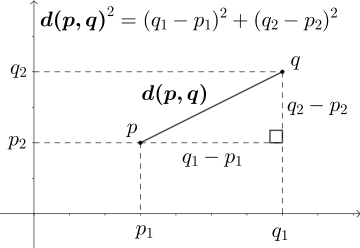

In [4]:
import numpy as np

def dist(x,y):   
    return np.sqrt(np.sum((x-y)**2))

doc1 = np.array((2,3,0,1))
doc2 = np.array((1,2,3,1))
doc3 = np.array((2,1,2,2))
docQ = np.array((1,1,0,1))

print('문서1과 문서Q의 거리 :',dist(doc1,docQ))
print('문서2과 문서Q의 거리 :',dist(doc2,docQ))
print('문서3과 문서Q의 거리 :',dist(doc3,docQ))

문서1과 문서Q의 거리 : 2.23606797749979
문서2과 문서Q의 거리 : 3.1622776601683795
문서3과 문서Q의 거리 : 2.449489742783178


## 2. 자카드 유사도(Jaccard similarity)

- 정의:
  - 합집합에서 교집합의 비율을 구한다면 두 집합 A와 B의 유사도를 구할 수 있다는 것
  - $J(doc_{1},doc_{2})=\frac{doc_{1}∩doc_{2}}{doc_{1}∪doc_{2}}$

In [8]:
doc1 = "apple banana everyone like likey watch card holder"
doc2 = "apple banana coupon passport love you"

# 토큰화
tokenized_doc1 = doc1.split()
tokenized_doc2 = doc2.split()

print('문서1 :',tokenized_doc1)
print('문서2 :',tokenized_doc2)

union = set(tokenized_doc1).union(set(tokenized_doc2))
print('문서1과 문서2의 합집합 :',union)

intersection = set(tokenized_doc1).intersection(set(tokenized_doc2))
print('문서1과 문서2의 교집합 :',intersection)

print('자카드 유사도 :',len(intersection)/len(union))

문서1 : ['apple', 'banana', 'everyone', 'like', 'likey', 'watch', 'card', 'holder']
문서2 : ['apple', 'banana', 'coupon', 'passport', 'love', 'you']
문서1과 문서2의 합집합 : {'love', 'like', 'watch', 'likey', 'banana', 'card', 'holder', 'apple', 'everyone', 'you', 'passport', 'coupon'}
문서1과 문서2의 교집합 : {'banana', 'apple'}
자카드 유사도 : 0.16666666666666666


# 3) 레벤슈타인 거리를 이용한 오타 정정

- 나중에 공부 필요